# Cats vs Dogs 

*The training archive contains 25,000 images of dogs and cats. We will train our model on these files and predict the labels for test1.zip (1 = dog, 0 = cat).*

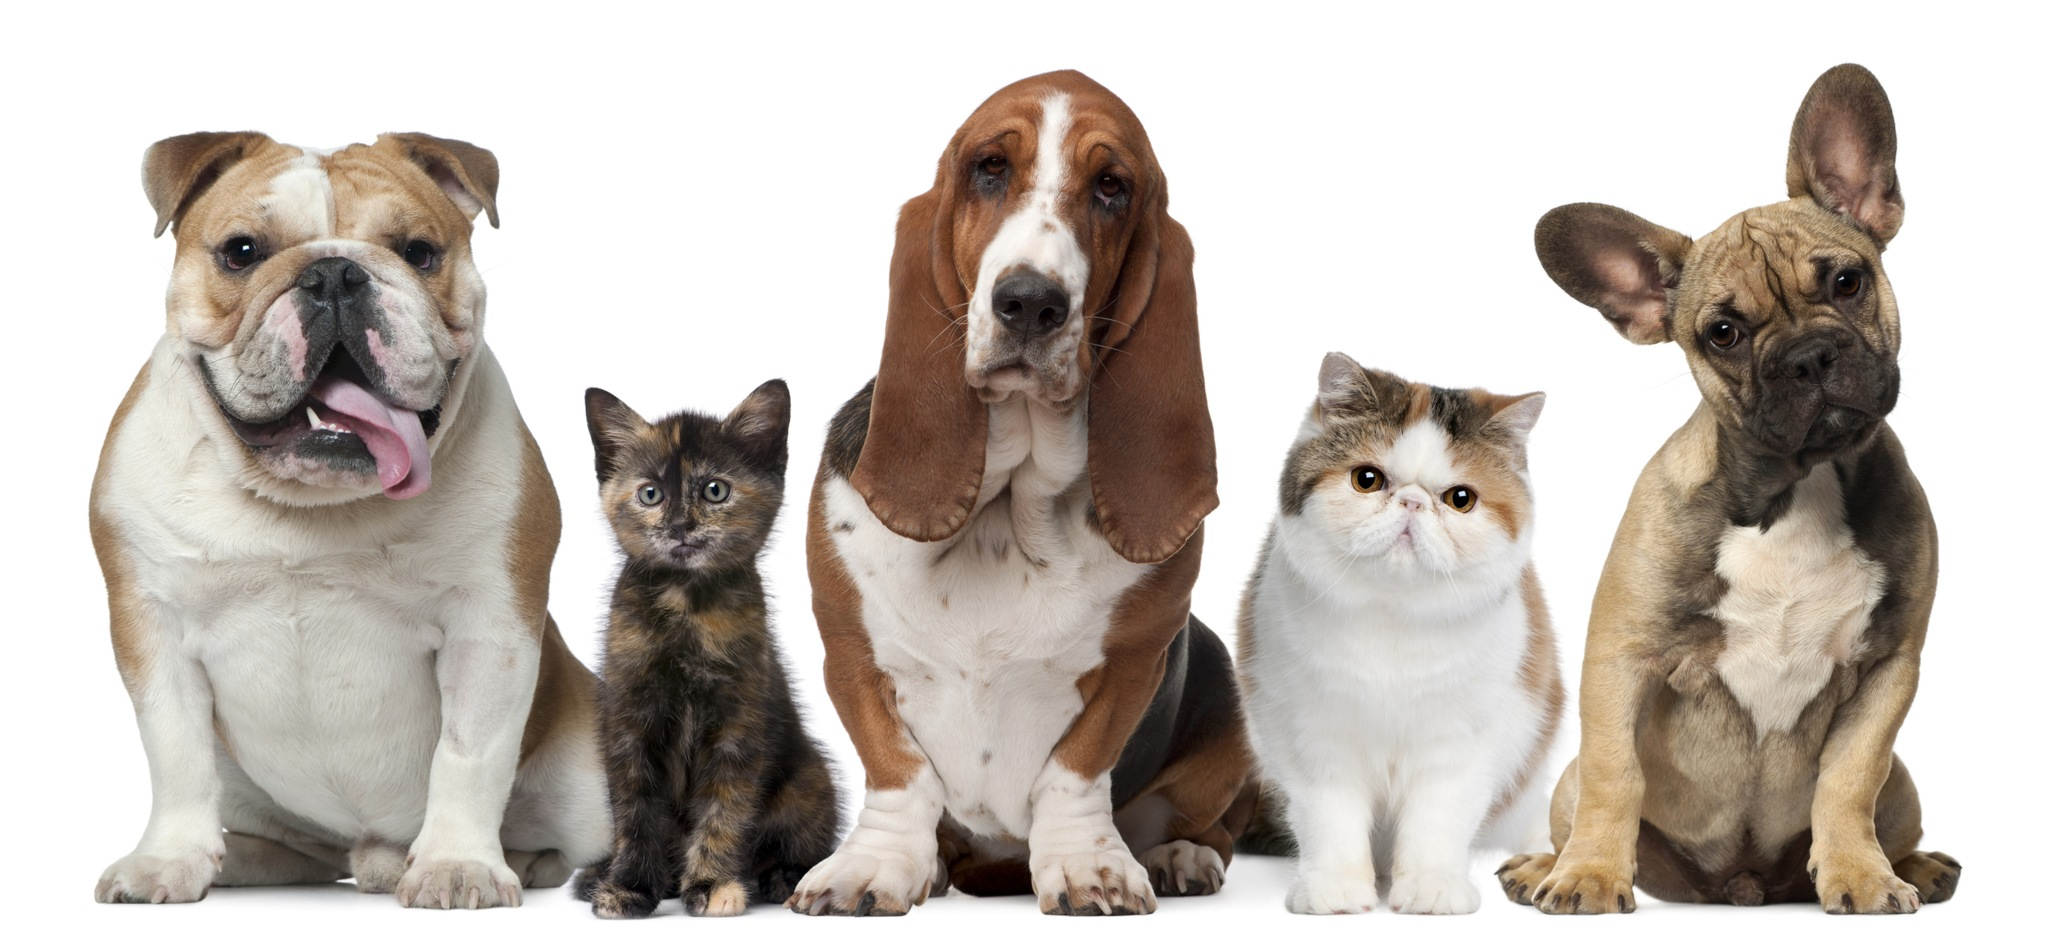

In [38]:
import cv2
import pandas as pd
import numpy as np
import os               
from random import shuffle
from tqdm import tqdm 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import seaborn as sns
from os import listdir
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
from sklearn.pipeline import Pipeline
from matplotlib.image import imread
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


**Lets resize all of our pictures and turn them into A dataset.**

In [4]:
TRAIN_DIRECTORY= r'C:\Users\yasmi\OneDrive\Desktop\dogs-vs-cats\train\train' 
PIC_SIZE = 50
LR = 1e-3

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [5]:
def label_img(img):
    word_label = img.split('.')[-3]
   
    if word_label == 'cat': return 1
    #                             
    elif word_label == 'dog': return 0

In [6]:
named_data =[]
training_data = []
for img in tqdm(os.listdir(TRAIN_DIRECTORY)):
        name = label_img(img)
        path = os.path.join(TRAIN_DIRECTORY,img)
        pic = cv2.imread(path, cv2.COLOR_BGR2RGB)
        pic = cv2.resize(pic, (PIC_SIZE,PIC_SIZE))
        training_data.append(pd.Series(pic.flatten()))
        named_data.append(name)

100%|██████████| 25000/25000 [02:29<00:00, 166.75it/s]


In [8]:
images_df = pd.DataFrame(training_data)
labels_df = pd.DataFrame(named_data, columns = ['labels'])

In [9]:
df = pd.concat([images_df, labels_df], axis=1)

# Understanding our data

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,labels
0,92,169,208,100,177,216,104,182,225,110,...,0,2,2,0,2,2,0,2,2,1
1,42,43,39,64,58,55,36,40,35,44,...,48,52,70,52,57,75,20,26,39,1
2,53,45,38,61,47,41,64,54,47,69,...,48,152,164,2,183,185,10,183,187,1
3,217,222,221,220,225,224,237,235,235,239,...,208,211,210,218,220,220,207,212,215,1
4,72,109,137,83,120,148,48,87,115,90,...,82,105,120,59,91,102,66,90,102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,107,144,148,110,147,151,113,150,154,114,...,132,168,178,134,169,179,135,170,180,0
24996,53,81,111,63,89,113,44,76,95,43,...,50,76,99,66,97,118,37,64,85,0
24997,45,48,53,50,53,58,51,53,54,41,...,134,175,213,28,76,116,128,172,215,0
24998,253,253,253,229,230,253,175,189,235,91,...,98,99,112,97,95,111,107,107,122,0


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,labels
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.00000,25000.00000
mean,105.637920,113.795720,118.186360,106.115840,114.385080,118.906200,106.673560,115.168040,119.755880,107.202040,...,113.020320,121.377880,127.927840,112.018560,120.324880,126.72572,111.297480,119.383840,125.65276,0.50000
std,71.960065,70.476819,70.933098,71.774213,70.203541,70.728607,71.564416,70.005545,70.515969,71.676186,...,68.646543,66.785812,68.321448,68.860044,66.968752,68.54405,69.144785,67.282821,68.69772,0.50001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
25%,45.000000,55.000000,59.000000,45.000000,55.000000,60.000000,46.000000,56.000000,61.000000,47.000000,...,57.000000,68.000000,74.000000,56.000000,67.000000,72.00000,54.000000,66.000000,71.00000,0.00000
50%,96.000000,108.000000,114.000000,96.000000,109.000000,115.000000,97.000000,110.000000,117.000000,98.000000,...,106.000000,120.000000,128.000000,106.000000,118.000000,126.00000,104.000000,117.000000,124.00000,0.50000
75%,157.000000,165.000000,172.000000,158.000000,166.000000,172.000000,159.000000,167.000000,173.000000,160.000000,...,163.000000,170.000000,180.000000,162.000000,169.000000,178.00000,161.000000,168.000000,177.00000,1.00000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.00000,1.00000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 7501 entries, 0 to labels
dtypes: int64(1), uint8(7500)
memory usage: 179.0 MB


# Lets look at our Data

the shape of the image : dog.100 is :  (397, 500, 3)
the shape of the image : dog.101 is :  (500, 440, 3)
the shape of the image : dog.102 is :  (373, 499, 3)
the shape of the image : dog.103 is :  (433, 499, 3)
the shape of the image : dog.104 is :  (375, 499, 3)
the shape of the image : dog.105 is :  (221, 170, 3)
the shape of the image : dog.106 is :  (374, 500, 3)
the shape of the image : dog.107 is :  (458, 499, 3)
the shape of the image : dog.108 is :  (480, 259, 3)
the shape of the image : dog.110 is :  (375, 499, 3)


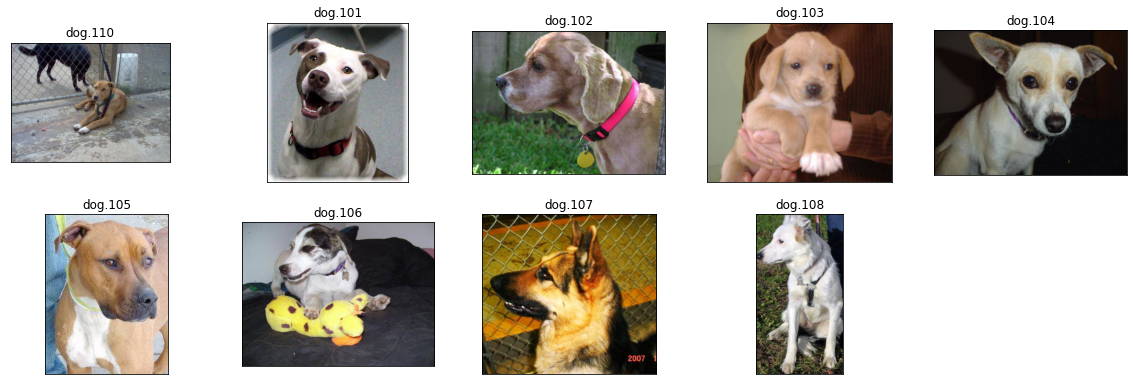

In [66]:
folder = '/Users/yasmi/OneDrive/Desktop/dogs-vs-cats/train/train/'
img_range = [int(x) for x in np.linspace(start = 100, stop = 110, num =10)]
plt.figure(figsize=(20,10))
for i in img_range:
    plt.subplot(250 + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('dog.' + str(i))
    plt.xticks([])
    plt.yticks([])
    print(f"the shape of the image : {'dog.' + str(i)} is : " , image.shape)
plt.show()

# Lets recolor our images

In [ ]:
photos, labels = list(), list()
for file in listdir(folder):
    if file.startswith('dog'):
        output =0.0
    else :
        output =1.0
    photo = load_img(folder + file, target_size=(50,50),color_mode='grayscale')
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

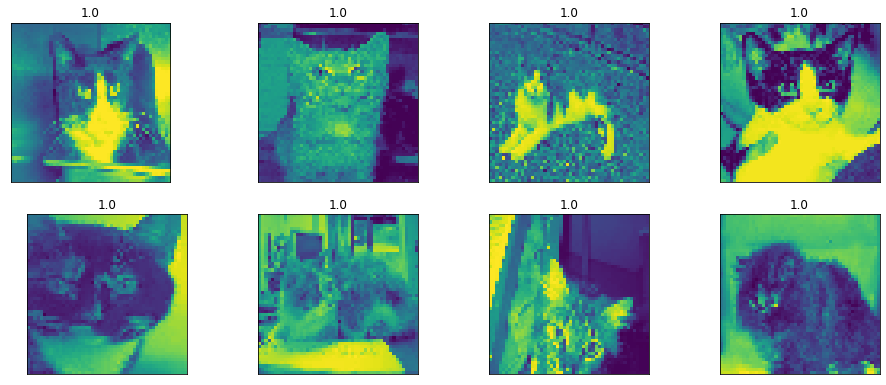

In [69]:
img_range = [int(x) for x in np.linspace(start = 100, stop = 110, num = 9)]
plt.figure(figsize=(20,10))
for i in img_range:
    plt.subplot(250 + 1 + i )
    plt.imshow(photos[i])
    plt.title(labels[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Data preprocessing

In [80]:
X = df.drop(['labels'],axis=1)
Y = df['labels']

In [81]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=120)
print("Xtrain : ",Xtrain.shape)
print("Xtest : ",Xtest.shape)
print("Ytrain : ",Ytrain.shape)
print("Ytest : ",Ytest.shape)

Xtrain :  (17500, 7501)
Xtest :  (7500, 7501)
Ytrain :  (17500,)
Ytest :  (7500,)


# PCA

**PCA**
Principal Component Analysis (PCA) is the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then
it projects the data onto it.

Before projecting the training set onto a lower-dimensional hyperplane, we'd have to choose the right hyperplane.  The projection onto the solid line preserves the maximumvariance, while the projection onto the dotted line preserves very little variance, and the projection onto the dashed line preserves an intermediate amount of variance.

In [82]:
scale_pipeline = Pipeline([
 ("std_scaler", StandardScaler()),
 ("pca", PCA(n_components=0.90, random_state=0,svd_solver='full')),
])
Xtrain= scale_pipeline.fit_transform(Xtrain)
Xtest= scale_pipeline.transform(Xtest)

# Logistic Regression Model

In [91]:
log_reg = LogisticRegression(random_state=42,solver='liblinear',n_jobs=-1)
log_reg.fit(Xtrain,Ytrain)
y_predict = log_reg.predict(Xtest)
log_reg.score(Xtest,Ytest)

0.7188

In [92]:
logistic_regression_prec = precision_score(y_predict,Ytest, average='macro')
print('precision:',logistic_regression_prec)
logistic_regression_recall = recall_score(y_predict,Ytest, average='macro')
print('recall:',logistic_regression_recall)
logistic_regression_f1 = f1_score(y_predict,Ytest, average='macro')
print('f1:',logistic_regression_f1)
logistic_regression_f2 = metrics.fbeta_score(y_predict, Ytest, beta=3,average='macro')
print("f2:",logistic_regression_f2)

precision: 0.7188317817091154
recall: 0.7188294941015025
f1: 0.7187999550079928
f2: 0.7188186767777208


# KNN

*Training the KNN model*

In [85]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,Ytrain)
y_predict = model.predict(Xtest)
acc = model.score(Xtest,Ytest)
print("Raw pixel accuracy: {:.2f}%".format(acc * 100))

Raw pixel accuracy: 59.28%


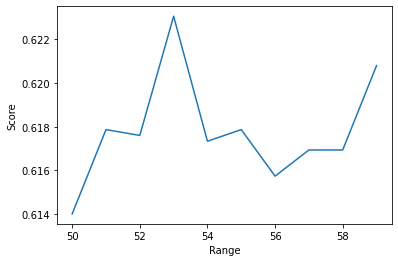

In [84]:
score_array = []
for each in range(50,60):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(Xtrain,Ytrain)
    score_array.append(knn_loop.score(Xtest,Ytest))
    
plt.plot(range(50,60),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [86]:
knn_prec = precision_score(y_predict,Ytest, average='macro')
print('precision:',knn_prec)
knn_recall = recall_score(y_predict,Ytest, average='macro')
print('recall:',knn_recall)
knn_f1 = f1_score(y_predict,Ytest, average='macro')
print('f1:',knn_f1)
knn_f2 = metrics.fbeta_score(y_predict, Ytest, beta=3,average='macro')
print("f2:",knn_f2)

precision: 0.5924457595259335
recall: 0.593441641132275
f1: 0.5915554531278988
f2: 0.592839045767301


# Ensamble Learning with XGBoost

In [88]:
xg_boost = XGBClassifier(subsample=1 ,n_estimators = 150,min_child_weight=5,max_depth=3,learning_rate=0.2, gamma=2, n_jobs = -1,colsample_bytree=1)
xg_boost.fit(Xtrain,Ytrain)
y_predict = xg_boost.predict(Xtest)
xg_boost.score(Xtest,Ytest)

0.7122666666666667

In [89]:
xgb_prec = precision_score(y_predict,Ytest, average='macro')
print('precision:',xgb_prec)
xgb_recall = recall_score(y_predict,Ytest, average='macro')
print('recall:',xgb_recall)
xgb_f1 = f1_score(y_predict,Ytest, average='macro')
print('f1:',xgb_f1)
xgb_f2 = metrics.fbeta_score(y_predict, Ytest, beta=3,average='macro')
print("f2:",xgb_f2)

precision: 0.7121918180742413
recall: 0.7123094035051567
f1: 0.7121954241615291
f2: 0.7122777710754771


Our model is accuarte at 71.2% which means that our of the 7500 images we have it would misclassify 2650 which is not as high result as we expect. We will next try to find out wether we can find a better model.

# Stacking

**Stacking**
This model is quite different than the last one we used, instead of using trivial functions
(such as hard voting) to aggregate the predictions of all predictors in an ensemble,
it would train the model to make these aggregations. For example, each of the bottom three
predictors predicts a different value and then the final predictor 
(blender as it "mixes" the previous predictions) takes these predictions as inputs and makes the
final prediction.

In [93]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('knn_loop' , knn_loop),
    ('log_reg', log_reg),
    ('xg_boost' , xg_boost)
]
stc = StackingClassifier(
    estimators=estimators, final_estimator=xg_boost
)
stc.fit(Xtrain,Ytrain)
y_predict = stc.predict(Xtest)
stc.score(Xtest, Ytest)

0.7389333333333333

**We can see that the accuracy hasn't increased by 0.02% however, since we are dealing with such great data every small improvment matters.**

In [94]:
stc_prec = precision_score(y_predict,Ytest, average='macro')
print('precision:',stc_prec)
stc_recall = recall_score(y_predict,Ytest, average='macro')
print('recall:',stc_recall)
stc_f1 = f1_score(y_predict,Ytest, average='macro')
print('f1:',stc_f1)
stc_f2 = metrics.fbeta_score(y_predict, Ytest, beta=3,average='macro')
print("f2:",stc_f2)

precision: 0.7390076849205338
recall: 0.7390748076025141
f1: 0.7389251460259127
f2: 0.7390262888330525


# Random Forest 

Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. This is called Ensemble Learning as we are building a model using many other models which is similar to team work, and it is often a great way to push ML algorithms even further.

In [95]:
random_forest = RandomForestClassifier()
random_forest.fit(Xtrain,Ytrain)
y_predict = random_forest.predict(Xtest)
random_forest.score(Xtest, Ytest)

0.6493333333333333

In [96]:
random_forest_prec = precision_score(y_predict,Ytest, average='macro')
print('precision:',random_forest_prec)
random_forest_recall = recall_score(y_predict,Ytest, average='macro')
print('recall:',random_forest_recall)
random_forest_f1 = f1_score(y_predict,Ytest, average='macro')
print('f1:',random_forest_f1)
random_forest_f2 = metrics.fbeta_score(y_predict, Ytest, beta=3,average='macro')
print("f2:",random_forest_f2)

precision: 0.6497195527408108
recall: 0.6515236354214649
f1: 0.64841166561003
f2: 0.6505412039155779


# Our Best model

**The best model is Stacking which has reached an acuraccy of 73.89%**

In [97]:
report = classification_report(Ytest,stc.predict(Xtest))
print(report)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      3724
           1       0.75      0.73      0.74      3776

    accuracy                           0.74      7500
   macro avg       0.74      0.74      0.74      7500
weighted avg       0.74      0.74      0.74      7500

